In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
import pandas as pd
import seaborn as sns
import sys, os

# below, figure output is defined relative to the mrpy_path root folder; moved for simplicity on github
mrpy_path = ".../mrpy"
# if mrpy is installed correctly in the environment, skip this.
if not mrpy_path in sys.path:
    sys.path.append(mrpy_path)

from mrpy import calculate, hs1chirp_paper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
sns.set_theme()
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1.0, "axes.linewidth": 0.5, "xtick.major.size": 3.5, "xtick.major.width": 0.5, "xtick.minor.size": 1.75, "xtick.minor.width": 0.25, "ytick.major.size": 3.5, "ytick.major.width": 0.5, "ytick.minor.size": 1.75, "ytick.minor.width": 0.25, "text.usetex": True, "font.sans-serif":["Computer Modern Sans Serif"], "svg.fonttype": "none", "font.size": 8, "axes.titlesize": 10, "axes.labelsize": 10, "xtick.labelsize": 8, "ytick.labelsize": 8, "legend.fontsize": 8, "legend.title_fontsize": 8})
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

palette = sns.color_palette("bright")
bog_palette = palette[0:3]
ob_palette = [palette[1], palette[0]]
pana_palette = [palette[7], palette[1], palette[0]]
panb_palette = [palette[7], palette[8], palette[2]]
panc_palette = [palette[7], palette[3], palette[4]]
pand_palette = [palette[0], palette[1], palette[2], palette[8], palette[4], palette[3]]

pana2_palette = [palette[7], palette[0]]
panb2_palette = [palette[7], palette[1]]
panc2_palette = [palette[7], palette[2]]

f2_palettes = [pana_palette, panb_palette, panc_palette, pand_palette]
f3_palettes = [pana2_palette, panb2_palette, panc2_palette, bog_palette]
f4_palettes = [pana2_palette, panb2_palette, pand_palette]

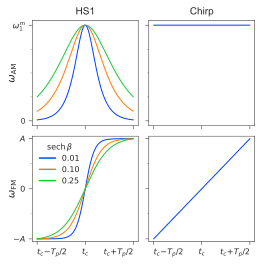

In [181]:
# figure 1 showing pulse parameter definitions
hs1chirp_paper.plot_hs1chirp_pulses(bog_palette)
fig1_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "f1_labeled_pulses.svg")
plt.savefig(fig1_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

In [ ]:
comp_n = 1001
n_steps = 10000

app = None
app = {
    "df": 0.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "M_a": np.array([0.0, 0.0, 1.0]),
    "phic": 0.0,
    "R": 10.0,
    "R1": 0.0,
    "R2": 0.0,
    "Tp": 5.0e-3,
    "w1m": 2*np.pi*2000,
} 

# 1% truncation
app["beta"] = 5.298
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfa1, dfa2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)
# print("0.01", app["w1m"]/(2*np.pi), app["R"], app["A"]/(2*np.pi))

# 10% truncation
app["beta"] = 2.993
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfb1, dfb2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)
# print("0.10", app["w1m"]/(2*np.pi), app["R"], app["A"]/(2*np.pi))

# 25% truncation
app["beta"] = 2.063
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfc1, dfc2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)
# print("0.25", app["w1m"]/(2*np.pi), app["R"], app["A"]/(2*np.pi))

# final error calculations
n_step_list = [1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6] #, 5e6, 1e7]
dfd = hs1chirp_paper.hs1_finale_wrapper(app, n_step_list, parameter="beta", values=[5.298, 2.993, 2.063])

hs1chirp_paper.plot_7panel_comparison(app, dfa1, dfa2, dfb1, dfb2, dfc1, dfc2, dfd, palettes=f2_palettes, labels=[r"$\operatorname{sech}\beta = 0.01$", r"$\operatorname{sech}\beta = 0.10$", r"$\operatorname{sech}\beta = 0.25$", ""])

fig2_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "f2_HS1_accuracy.svg")
plt.savefig(fig2_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

KeyboardInterrupt: 

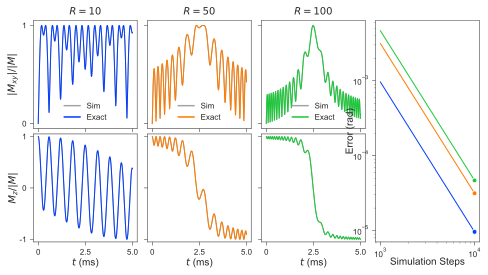

In [ ]:
comp_n = 1001
n_steps = 10000

app = None
app = {
    "df": 0.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "M_a": np.array([0.0, 0.0, 1.0]),
    "phic": 0.0,
    "R": 100,
    "R1": 0.0,
    "R2": 0.0,
    "Tp": 5.0e-3,
    "w1m": 2*np.pi*1500,
} 

variable = "R"
raw_values = [10, 50, 100]
# values = [2*np.pi*x for x in raw_values]
values = raw_values
labels = [r"$R = {0}$".format(x) for x in raw_values]

app[variable] = values[0]
app["A"] = float(calculate.chirp_calc_A(R=app["R"], Tp=app["Tp"]))
dfa1, dfa2 = hs1chirp_paper.chirp_sim_v_calcs_compM(app, comp_n, n_steps)
# print(app["R"], app["w1m"]/(2*np.pi), app["A"]/(2*np.pi))

app[variable] = values[1]
app["A"] = float(calculate.chirp_calc_A(R=app["R"], Tp=app["Tp"]))
dfb1, dfb2 = hs1chirp_paper.chirp_sim_v_calcs_compM(app, comp_n, n_steps)
# print(app["R"], app["w1m"]/(2*np.pi), app["A"]/(2*np.pi))

app[variable] = values[2]
app["A"] = float(calculate.chirp_calc_A(R=app["R"], Tp=app["Tp"]))
dfc1, dfc2 = hs1chirp_paper.chirp_sim_v_calcs_compM(app, comp_n, n_steps)
# print(app["R"], app["w1m"]/(2*np.pi), app["A"]/(2*np.pi))

# # final error calculations
n_step_list = [1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6] #, 5e6, 1e7]
dfd = hs1chirp_paper.chirp_finale_wrapper(app, n_step_list, parameter=variable, values=values)

hs1chirp_paper.plot_7panel_comparison(app, dfa1, dfa2, dfb1, dfb2, dfc1, dfc2, dfd, palettes=f3_palettes, labels=labels)

fig3_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "f3_chirp_accuracy.svg")
plt.savefig(fig3_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

In [ ]:
# figure 4 BIR4
n_steps = 5000 # doubled for calc
target_flip = 0.5*np.pi

app = None
app = {
    "df": 0.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "M_a": np.array([0.0, 0.0, 1.0]),
    "phic": 0.0,
    "R": 32.0,
    "R1": 0.0,
    "R2": 0.0,
    "Tp": 5.0e-3,
    "w1m": 2*np.pi*2000,
} 

# 1% truncation
app["beta"] = 5.298
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfa0, dfa1, dfa2 = hs1chirp_paper.bir4_hs1_sim_v_calcs_compM(app, target_flip, n_steps)
# print("0.01", app["w1m"]/(2*np.pi), app["R"], app["A"]/(2*np.pi))

# 10% truncation
app["beta"] = 2.993
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfb0, dfb1, dfb2 = hs1chirp_paper.bir4_hs1_sim_v_calcs_compM(app, target_flip, n_steps)
# print("0.01", app["w1m"]/(2*np.pi), app["R"], app["A"]/(2*np.pi))

# final error calculations
n_step_list = [1e3, 5e3, 1e4, 5e4, 1e5, 5e5] #, 1e6] #, 5e6, 1e7]
dfc = hs1chirp_paper.bir4_hs1_sim_v_calcs_finale_wrapper(app, target_flip=target_flip, n_step_list=n_step_list, parameter="beta", values=[5.298, 2.993])

hs1chirp_paper.plot_9panel_comparison(app, dfa0, dfa1, dfa2, dfb0, dfb1, dfb2, dfc, palettes=f4_palettes, labels=[r"$\operatorname{sech}\beta = 0.01$", r"$\operatorname{sech}\beta = 0.10$", ""])

fig4_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "f4_bir4_accuracy.svg")
plt.savefig(fig4_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

[mpc(real='0.0', imag='0.0'), mpc(real='-0.93836858870384787', imag='-0.24011596571518412')]
[mpc(real='0.0', imag='0.0'), mpc(real='-0.93836858870384787', imag='-0.24011596571518412'), mpc(real='1.0662208802777231', imag='0.27283165636138484')]
[mpc(real='0.0', imag='0.0'), mpc(real='-0.93836858870384787', imag='-0.24011596571518412'), mpc(real='1.0662208802777231', imag='0.27283165636138484'), mpc(real='-0.061049661642110169', imag='-0.018794801109379752')]
[mpc(real='0.0', imag='0.0'), mpc(real='-0.93836858870384787', imag='-0.24011596571518412')]
[mpc(real='0.0', imag='0.0'), mpc(real='-0.93836858870384787', imag='-0.24011596571518412'), mpc(real='1.0662208802777231', imag='0.27283165636138484')]
[mpc(real='0.0', imag='0.0'), mpc(real='-0.93836858870384787', imag='-0.24011596571518412'), mpc(real='1.0662208802777231', imag='0.27283165636138484'), mpc(real='-0.061049661642110169', imag='-0.018794801109379752')]
[mpc(real='0.0', imag='0.0'), mpc(real='0.8570646969488408', imag='-0.40

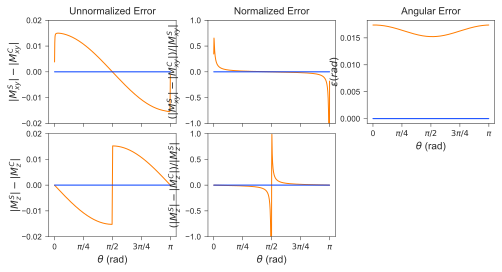

In [ ]:
n_steps = 2000

app = None
app = {
    "beta": 5.298,
    "df": 2*np.pi*1000.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "phic": 0.0,
    "R": 1.0,
    "R1": 0.0,
    "R2": 0.0,
    "Tp": 5.0e-3,
    "w1m": 2*np.pi*2000,
} 

thetas = np.linspace(0, np.pi, 1000)
M_as = [np.array([0, np.sin(theta), np.cos(theta)]) for theta in thetas]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))

dfs = hs1chirp_paper.hs1_finale2_wrapper(app=app, n_steps=n_steps, thetas=thetas)
hs1chirp_paper.plot_5panel_serror(app=app, dfs=dfs, palettes=[ob_palette], titles=["Unnormalized Error", "Normalized Error"], xticks=[0, np.pi/4, np.pi/2, np.pi*3/4, np.pi], xticklabels=["0", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$", r"$\pi$"])

figs1_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "fs1_angular_error.svg")
plt.savefig(figs1_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

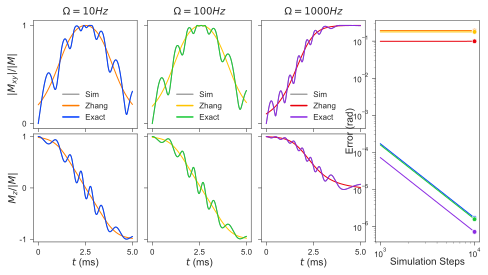

In [ ]:
comp_n = 1001
n_steps = 10000

app = None
app = {
    "beta": 2.993,
    "df": 0.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "M_a": np.array([0.0, 0.0, 1.0]),
    "phic": 0.0,
    "R": 10.0,
    "R1": 0.0,
    "R2": 0.0,
    "Tp": 5.0e-3,
    "w1m": 2*np.pi*2000,
} 

variable = "df"
raw_values = [10, 100, 1000]
values = [2*np.pi*x for x in raw_values]
labels = [r"$\Omega = {0} Hz$".format(x) for x in raw_values]

# a
app[variable] = values[0]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfa1, dfa2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)

# b
app[variable] = values[1]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfb1, dfb2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)

# c
app[variable] = values[2]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfc1, dfc2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)

# final error calculations
n_step_list = [1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6] #, 5e6, 1e7]
dfd = hs1chirp_paper.hs1_finale_wrapper(app, n_step_list, parameter=variable, values=values)

hs1chirp_paper.plot_7panel_comparison(app, dfa1, dfa2, dfb1, dfb2, dfc1, dfc2, dfd, palettes=f2_palettes, labels=labels)

figs3_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "fs3_HS1_df.svg")
plt.savefig(figs3_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

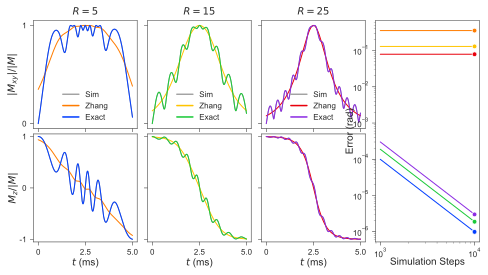

In [ ]:
comp_n = 1001
n_steps = 10000

app = None
app = {
    "beta": 2.993,
    "df": 100.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "M_a": np.array([0.0, 0.0, 1.0]),
    "phic": 0.0,
    "R": 10.0,
    "R1": 0.0,
    "R2": 0.0,
    "Tp": 5.0e-3,
    "w1m": 2*np.pi*2000,
} 

variable = "R"
raw_values = [5, 15, 25]
# values = [2*np.pi*x for x in raw_values]
values = raw_values
labels = [r"$R = {0}$".format(x) for x in raw_values]

# a
app[variable] = values[0]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfa1, dfa2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)

# b
app[variable] = values[1]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfb1, dfb2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)

# c
app[variable] = values[2]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfc1, dfc2 = hs1chirp_paper.hs1_sim_v_calcs_compM(app, comp_n, n_steps)

# final error calculations
n_step_list = [1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6] #, 5e6, 1e7]
dfd = hs1chirp_paper.hs1_finale_wrapper(app, n_step_list, parameter=variable, values=values)

hs1chirp_paper.plot_7panel_comparison(app, dfa1, dfa2, dfb1, dfb2, dfc1, dfc2, dfd, palettes=f2_palettes, labels=labels, legend_pos="lower center")

figs4_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "fs4_HS1_R.svg")
plt.savefig(figs4_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

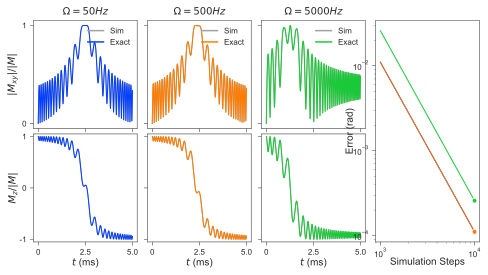

In [ ]:
comp_n = 1001
n_steps = 10000

app = None
app = {
    "df": 0.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "M_a": np.array([0.0, 0.0, 1.0]),
    "phic": 0.0,
    "R": 100,
    "R1": 0.0,
    "R2": 0.0,
    "Tp": 5.0e-3,
    "w1m": 2*np.pi*2000,
} 

variable = "df"
raw_values = [50, 500, 5000]
values = [2*np.pi*x for x in raw_values]
# values = raw_values
labels = [r"$\Omega = {0} Hz$".format(x) for x in raw_values]

app[variable] = values[0]
app["A"] = float(calculate.chirp_calc_A(R=app["R"], Tp=app["Tp"]))
dfa1, dfa2 = hs1chirp_paper.chirp_sim_v_calcs_compM(app, comp_n, n_steps)
# print(app["R"], app["w1m"]/(2*np.pi), app["A"]/(2*np.pi))

app[variable] = values[1]
app["A"] = float(calculate.chirp_calc_A(R=app["R"], Tp=app["Tp"]))
dfb1, dfb2 = hs1chirp_paper.chirp_sim_v_calcs_compM(app, comp_n, n_steps)
# print(app["R"], app["w1m"]/(2*np.pi), app["A"]/(2*np.pi))

app[variable] = values[2]
app["A"] = float(calculate.chirp_calc_A(R=app["R"], Tp=app["Tp"]))
dfc1, dfc2 = hs1chirp_paper.chirp_sim_v_calcs_compM(app, comp_n, n_steps)
# print(app["R"], app["w1m"]/(2*np.pi), app["A"]/(2*np.pi))

# # final error calculations
n_step_list = [1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6] #, 5e6, 1e7]
dfd = hs1chirp_paper.chirp_finale_wrapper(app, n_step_list, parameter=variable, values=values)

hs1chirp_paper.plot_7panel_comparison(app, dfa1, dfa2, dfb1, dfb2, dfc1, dfc2, dfd, palettes=f3_palettes, labels=labels, legend_pos="upper right")

figs5_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "fs5_chirp_df.svg")
plt.savefig(figs5_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

skipping plot d


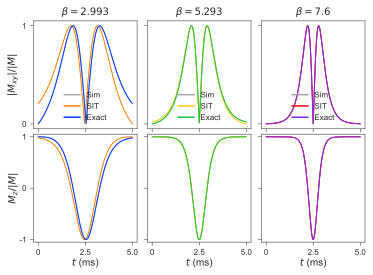

In [ ]:
comp_n = 1001
n_steps = 10000

app = None
app = {
    "beta": 7.6,
    "df": 0.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "M_a": np.array([0.0, 0.0, 1.0]),
    "phic": 0.0,
    "R": 00.0,
    "R1": 0.0,
    "R2": 0.0,
    "Tp": 5.0e-3,
} 

# w1m determined for SIT

variable = "beta"
raw_values = [2.993, 5.293, 7.6]
# values = [2*np.pi*x for x in raw_values]
values = raw_values
# labels = [r"$\beta = {0}$".format(x) for x in raw_values]
labels = [r"$\operatorname{sech}\beta = 0.10$", r"$\operatorname{sech}\beta = 0.01$", r"$\operatorname{sech}\beta = 0.001$", ""]

# a
app[variable] = values[0]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfa1, dfa2 = hs1chirp_paper.hs1_SIT_compM(app, comp_n, n_steps)

# b
app[variable] = values[1]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfb1, dfb2 = hs1chirp_paper.hs1_SIT_compM(app, comp_n, n_steps)

# c
app[variable] = values[2]
app["A"] = float(calculate.hs1_calc_A(beta=app["beta"], R=app["R"], Tp=app["Tp"]))
dfc1, dfc2 = hs1chirp_paper.hs1_SIT_compM(app, comp_n, n_steps)

# final error calculations
# n_step_list = [1e3, 5e3, 1e4, 5e4, 1e5] #, 5e5, 1e6, 5e6, 1e7]
# dfd = hs1chirp_paper.hs1_finale_wrapper(app, n_step_list, parameter=variable, values=values)

hs1chirp_paper.plot_7panel_comparison(app, dfa1, dfa2, dfb1, dfb2, dfc1, dfc2, None, palettes=f2_palettes, labels=labels, legend_pos="lower center")

figs2_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "fs2_HS1_SIT.svg")
plt.savefig(figs2_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)

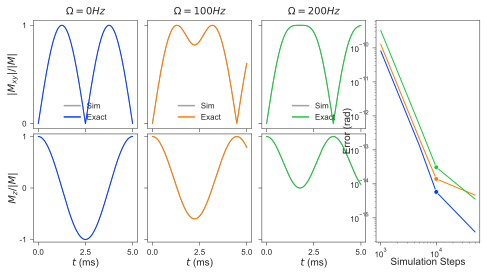

In [ ]:
comp_n = 1001
n_steps = 10000

app = None
app = {
    "df": 2*np.pi*0.0,
    "gamma": 2*np.pi*26753.0,
    "M0": 1.0,
    "M_a": np.array([0.0, 0.0, 1.0]),
    "phic": 0.5*np.pi,
    "R1": 0.0,
    "R2": 0.0,
    "ta": 0.0e-3,
    "Tp": 5.0e-3,
    "w1m": 2*np.pi*200
} 

variable = "df"
raw_values = [0, 100, 200]
# variable = "phic"
# raw_values = [0.0*np.pi, 0.25*np.pi, 0.5*np.pi]
values = [2*np.pi*x for x in raw_values]
# values = raw_values
labels = [r"$\Omega = {0} Hz$".format(x) for x in raw_values]

# a
app[variable] = values[0]
dfa1, dfa2 = hs1chirp_paper.square_sim_v_calcs_compM(app, comp_n, n_steps)

# b
app[variable] = values[1]
dfb1, dfb2 = hs1chirp_paper.square_sim_v_calcs_compM(app, comp_n, n_steps)

# c
app[variable] = values[2]
dfc1, dfc2 = hs1chirp_paper.square_sim_v_calcs_compM(app, comp_n, n_steps)

# final error calculations
n_step_list = [1e3, 5e3, 1e4, 5e4] #, 1e5] #, 5e5, 1e6] #, 5e6, 1e7]
dfd = hs1chirp_paper.square_finale_wrapper(app, n_step_list, parameter=variable, values=values)

hs1chirp_paper.plot_7panel_comparison(app, dfa1, dfa2, dfb1, dfb2, dfc1, dfc2, dfd, palettes=f3_palettes, labels=labels, legend_pos="lower center")

figs6_path = os.path.join(mrpy_path, "documents", "HS1chirp_figs_2.0", "fs6_square_accuracy.svg")
plt.savefig(figs6_path, transparent=True, dpi=300, bbox_inches="tight", pad_inches=0)